In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'],
                                                    iris['target'], random_state=0)


In [2]:
X_train.shape

(112, 4)

In [3]:
X_test.shape

(38, 4)

In [4]:
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [5]:
print(X_train.shape,X_test.shape)

(112, 4) (38, 4)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [7]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [8]:
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [9]:
prediction = knn.predict(X_new)
print(prediction)

[0]


In [10]:
print(iris['target_names'][prediction])

['setosa']


In [11]:
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)


0.9736842105263158

In [12]:
knn.score(X_test,y_test)

0.9736842105263158

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'],
                                                    iris['target'], random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9736842105263158

In [14]:
X = np.genfromtxt("iris_data.txt")
X[:3,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

# Exercises

# 1)
**Element-wise Comparison (`y_pred == y_test`):**

   This operation compares two numpy arrays, `y_pred` and `y_test`, on an element-by-element basis. Here, `y_pred` contains predicted labels for the test data, as predicted by the model, and `y_test` contains the actual labels for the test data.

   The result of this comparison is a new array of the same length, where each element is either `True` (if the corresponding elements in `y_pred` and `y_test` are equal) or `False` (if they are not equal).

   In the context of this code, a `True` value indicates a correct prediction by the model (the predicted label matches the actual label), and a `False` value indicates an incorrect prediction.

   **Calculation of Mean (`np.mean()`):**

   The `np.mean()` function calculates the average value of the elements in the input array. When applied to a Boolean array (an array of `True` and `False` values), it treats `True` as 1 and `False` as 0.
   So, `np.mean()` calculates the sum of all the `True` values (representing correct predictions) and divides it by the total number of predictions. This results in a decimal number between 0 and 1, which represents the proportion of correct predictions out of all predictions.





In [15]:
np.mean(y_pred == y_test)

0.9736842105263158

In [16]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

# 2)

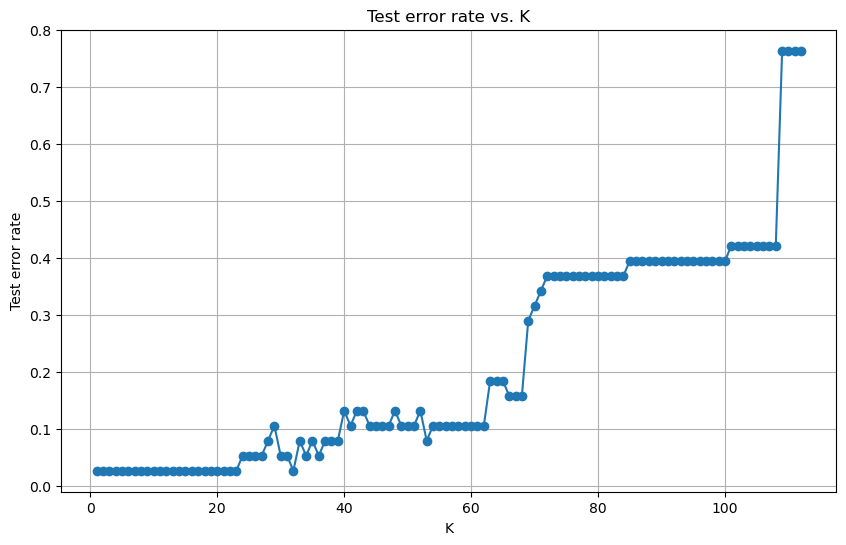

In [19]:
# range of K we want to try
K_range = range(1, 113)

# Array to store results
results = np.zeros(len(K_range))

for i, K in enumerate(K_range):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    # Compute error rate (1 - accuracy_score)
    results[i] = 1 - knn.score(X_test, y_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(K_range, results, marker='o')
plt.title('Test error rate vs. K')
plt.xlabel('K')
plt.ylabel('Test error rate')
plt.grid(True)
plt.show()

# 3)

In [18]:
# Load the dataset using load_iris
iris = load_iris()
iris_data = iris['data']

# Load the dataset from file
iris_data_from_file = np.genfromtxt("iris_data.txt")

# Check if the two datasets are identical
are_identical = np.array_equal(iris_data, iris_data_from_file)

print("Are the two datasets identical?", are_identical)

if not are_identical:
    print("The datasets are not identical. Let's explore the differences.")

    # Check the shapes of the two datasets
    print("Shape of iris_data:", iris_data.shape)
    print("Shape of iris_data_from_file:", iris_data_from_file.shape)

    # Find the indices where the two datasets differ
    diff_indices = np.where(iris_data != iris_data_from_file)

    print("Indices where the two datasets differ:", diff_indices)

Are the two datasets identical? False
The datasets are not identical. Let's explore the differences.
Shape of iris_data: (150, 4)
Shape of iris_data_from_file: (150, 4)
Indices where the two datasets differ: (array([34, 37, 37], dtype=int64), array([3, 1, 2], dtype=int64))
